In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn import linear_model
# from sklearn.linear_model import LinearRegression
# import statsmodels.api as sma
from scipy import stats

# Clean The Data

In [2]:
# import data
full_tract_data = pd.read_csv("EJSCREENStateTractData.csv")

In [3]:
# split for GA only
ga_full_tract_data = full_tract_data.query("STATE_NAME == 'Georgia'")

In [4]:
# remove irrelevant data
ga_spliced_tract_data = ga_full_tract_data.iloc[:, np.r_[0,4:10,12,14:18,19:29,40:43,63:69,118:124]]

In [5]:
#CLEAN COLS

# check for Nulls
null_count = []
for col in ga_spliced_tract_data:
    count = ga_spliced_tract_data[col].isnull().sum()
    null_count.append(count)
    # print (str(col) + " has " + str(count) + " null values.")

print ("The original number of rows and columns was " + str(ga_spliced_tract_data.shape))
print ("Null Counts:  " + str(null_count))

# if over 2% null, cut out
cuts = []
for i in range (len(null_count)):
    rowCount = len(ga_spliced_tract_data)
    if (null_count[i] >= (rowCount*.02)):
        cuts.append(i)

ga_cleaned_tract_data = ga_spliced_tract_data

print(cuts)
c = len(cuts) - 1
while (c >= 0):
    toCut = cuts[c]
    colName = ga_cleaned_tract_data.columns[toCut]
    # print (colName)
    ga_cleaned_tract_data = ga_cleaned_tract_data.drop(colName, axis=1)
    c = c -1

print ("The final number of rows and columns was " + str(ga_cleaned_tract_data.shape))

The original number of rows and columns was (2796, 37)
Null Counts:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 245, 0, 5, 12, 0, 0, 5, 5, 12, 12, 0, 0, 0, 0, 0, 0]
[21]
The final number of rows and columns was (2796, 36)


In [6]:
# CLEAN ROWS
ga_cleaned_tract_data = ga_cleaned_tract_data.dropna(axis = 0, how = 'any')

ga_cleaned_tract_data.shape

(2784, 36)

In [8]:
# all col names
ga_cleaned_tract_data.columns

Index(['OID_', 'CNTY_NAME', 'REGION', 'ACSTOTPOP', 'ACSIPOVBAS', 'ACSEDUCBAS',
       'ACSTOTHH', 'DEMOGIDX_2', 'PEOPCOLOR', 'PEOPCOLORPCT', 'LOWINCOME',
       'LOWINCPCT', 'UNEMPPCT', 'LINGISO', 'LINGISOPCT', 'LESSHS', 'LESSHSPCT',
       'UNDER5', 'UNDER5PCT', 'OVER64', 'OVER64PCT', 'PTSDF', 'UST', 'PWDIS',
       'D2_PTSDF', 'D5_PTSDF', 'D2_UST', 'D5_UST', 'D2_PWDIS', 'D5_PWDIS',
       'AREALAND', 'AREAWATER', 'NPL_CNT', 'TSDF_CNT', 'EXCEED_COUNT_80',
       'EXCEED_COUNT_80_SUP'],
      dtype='object')

## Export Cleaned Data

In [7]:
ga_cleaned_tract_data.to_csv("Wastewater_CleanedEJSCREENStateTractData.csv", index = None)

# Analysis

In [10]:
# names of columns
names = pd.DataFrame(pd.read_excel("EJSCREEN_2023_Tracts_Columns.xlsx")) 
names = names.iloc[1:,1:]
names.columns = ["Fieldname", "Description"]
display(names)

,Fieldname,Description
1,OBJECTID,Unique ID for block group in geodatabase
2,Shape,Coordinates defining the features
3,ID,Census FIPS code for block group
4,STATE_NAME,Name of state
5,ST_ABBREV,Two-letter abbreviation for state
...,...,...
123,TSDF_CNT,Number of Hazardous waste facilities in the bl...
124,EXCEED2_COUNT_80,Number of EJ Indexes exceeding 80 percentile
125,EXCEED2_COUNT_80_SUP,Number of Supplemental Indexes exceeding 80 pe...
126,Shape_Length,Shape length


In [11]:
def name_of (col):
    d = names.query("Fieldname == @col")
    display (d)
    return (d.values[0,1])
    #x_name = str(names.iloc[x_name,1].values[0])

In [17]:
def plot_with_regression(x_root, y_root):
    x = ga_cleaned_tract_data[x_root]
    y = ga_cleaned_tract_data[y_root]

    x_name = name_of(x_root)
    y_name = name_of(y_root)

    plt.scatter(x, y)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title("The relationship between " + x_name + " and " + y_name)

    #cleaning the data
    avg_ga_cleaned_tract_data = ga_cleaned_tract_data.groupby(x_root).agg(average_y = (y_root, "mean"))
    avg_ga_cleaned_tract_data = avg_ga_cleaned_tract_data.reset_index()
    #display(avg_ga_cleaned_tract_data)

    avg_x = avg_ga_cleaned_tract_data[x_root]
    avg_y = avg_ga_cleaned_tract_data["average_y"]

    line_best_fit = stats.linregress(avg_x, avg_y)
    #print("The R^2 is " + str(line_best_fit.rvalue**2))
    r_squared = np.round(line_best_fit.rvalue**2,3)
    labler = "line of best fit with an r^2 of "+ str(r_squared) + " and a p value of " + str(np.round(line_best_fit.pvalue,4))
    plt.plot(avg_x, line_best_fit.intercept + line_best_fit.slope*avg_x, 'r', label = labler)
    plt.legend()
    plt.show()

In [15]:
# demographics
x_roots = ["LOWINCPCT", "DEMOGIDX_2", "PEOPCOLORPCT", "LINGISOPCT"]
y_roots = ["UST", "PTSDF", "PWDIS"]

,Fieldname,Description
19,LOWINCPCT,% low income


,Fieldname,Description
43,UST,Underground storage tanks


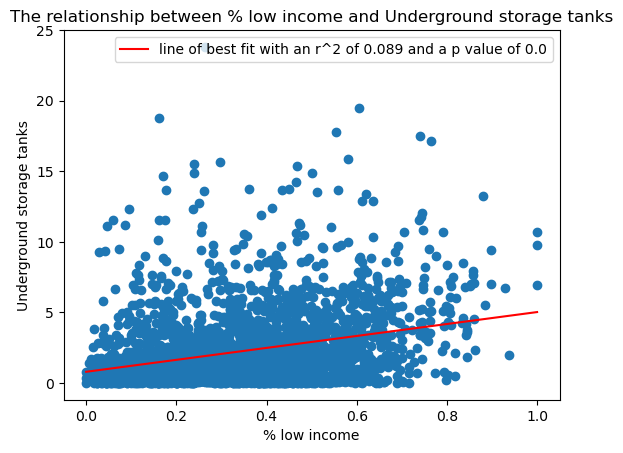

,Fieldname,Description
14,DEMOGIDX_2,Demographic Index


,Fieldname,Description
43,UST,Underground storage tanks


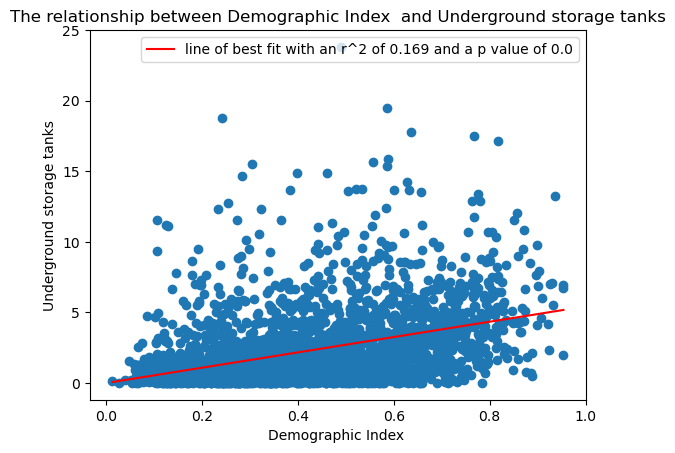

,Fieldname,Description
17,PEOPCOLORPCT,% people of color


,Fieldname,Description
43,UST,Underground storage tanks


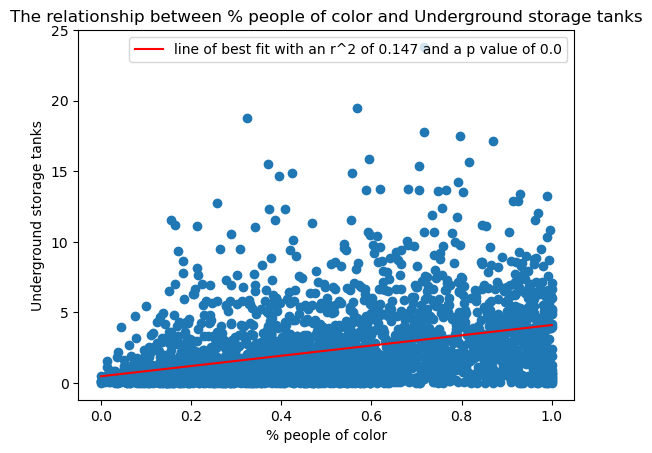

,Fieldname,Description
23,LINGISOPCT,% Limited English speaking households


,Fieldname,Description
43,UST,Underground storage tanks


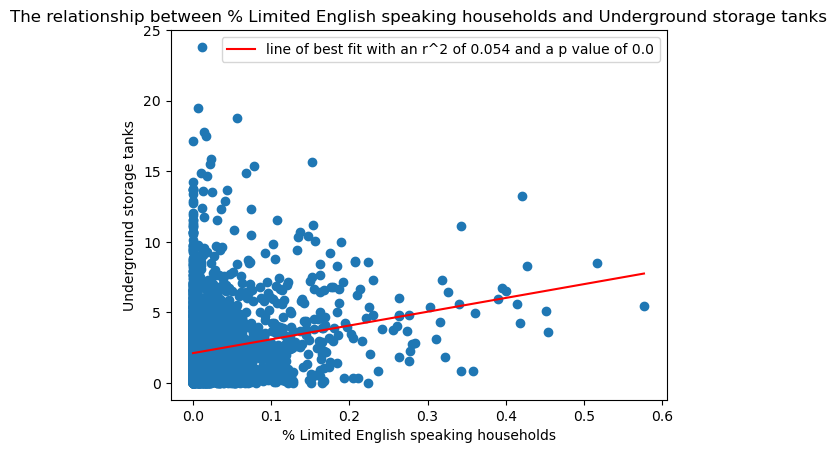

,Fieldname,Description
19,LOWINCPCT,% low income


,Fieldname,Description
42,PTSDF,Hazardous waste proximity


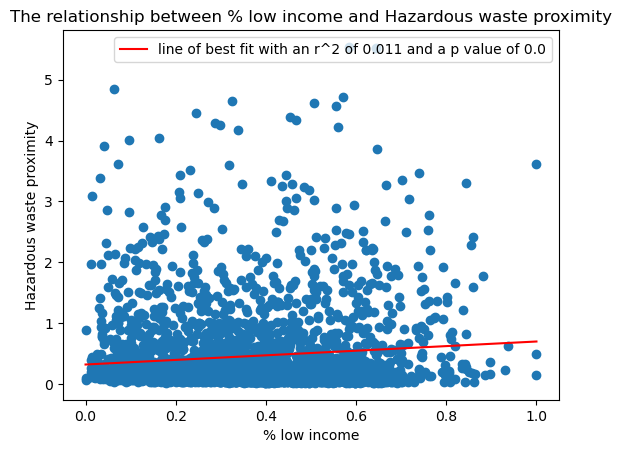

,Fieldname,Description
14,DEMOGIDX_2,Demographic Index


,Fieldname,Description
42,PTSDF,Hazardous waste proximity


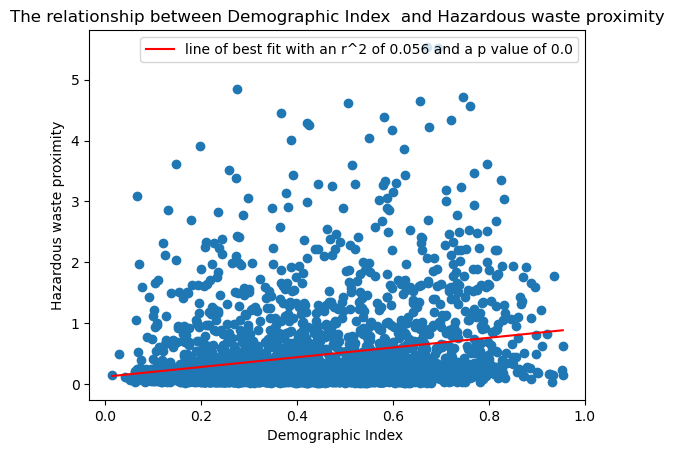

,Fieldname,Description
17,PEOPCOLORPCT,% people of color


,Fieldname,Description
42,PTSDF,Hazardous waste proximity


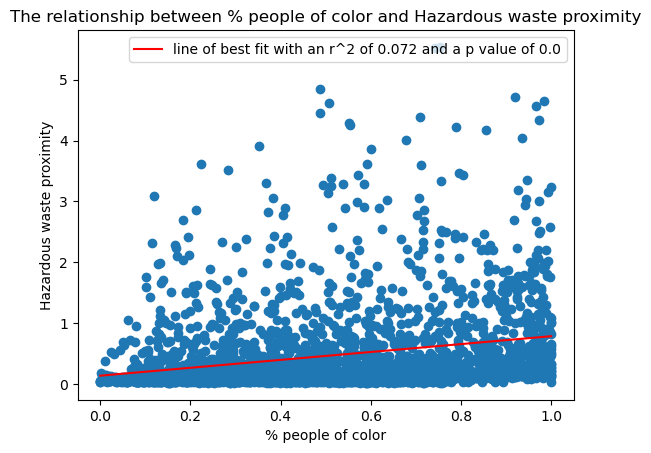

,Fieldname,Description
23,LINGISOPCT,% Limited English speaking households


,Fieldname,Description
42,PTSDF,Hazardous waste proximity


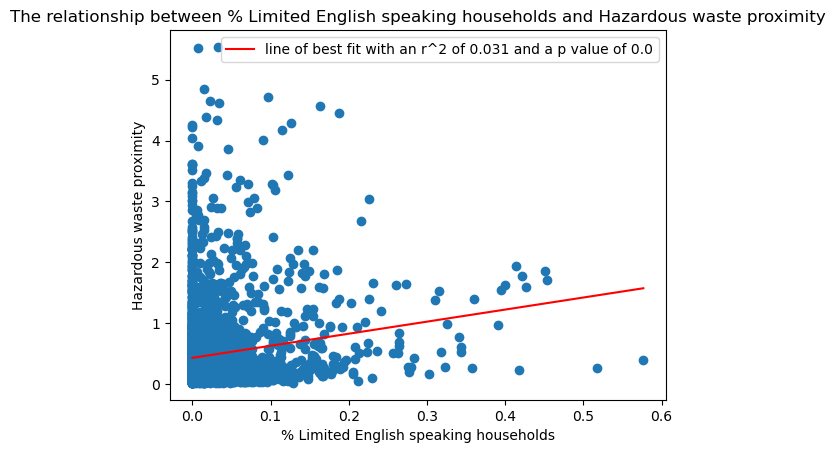

,Fieldname,Description
19,LOWINCPCT,% low income


,Fieldname,Description
44,PWDIS,Wastewater discharge


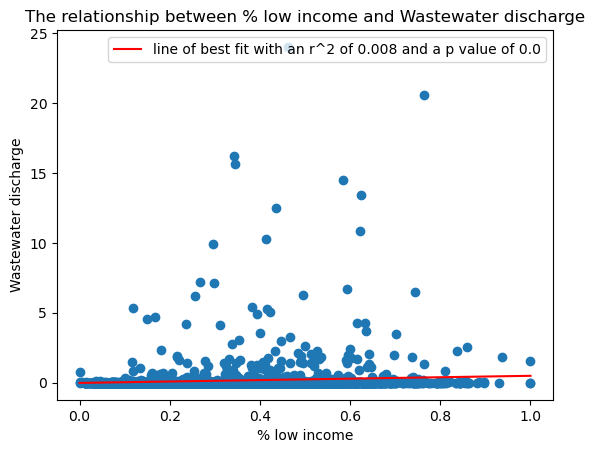

,Fieldname,Description
14,DEMOGIDX_2,Demographic Index


,Fieldname,Description
44,PWDIS,Wastewater discharge


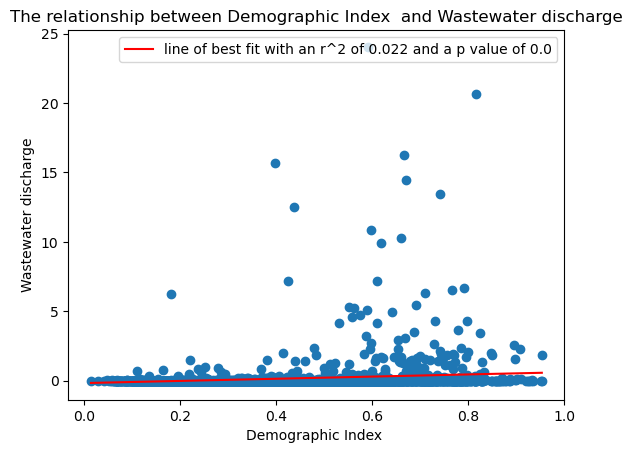

,Fieldname,Description
17,PEOPCOLORPCT,% people of color


,Fieldname,Description
44,PWDIS,Wastewater discharge


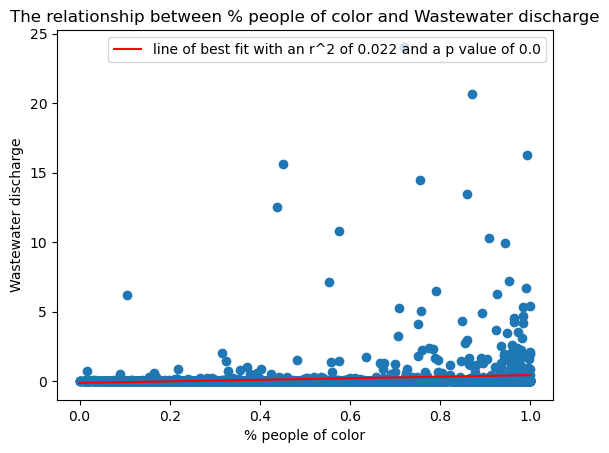

,Fieldname,Description
23,LINGISOPCT,% Limited English speaking households


,Fieldname,Description
44,PWDIS,Wastewater discharge


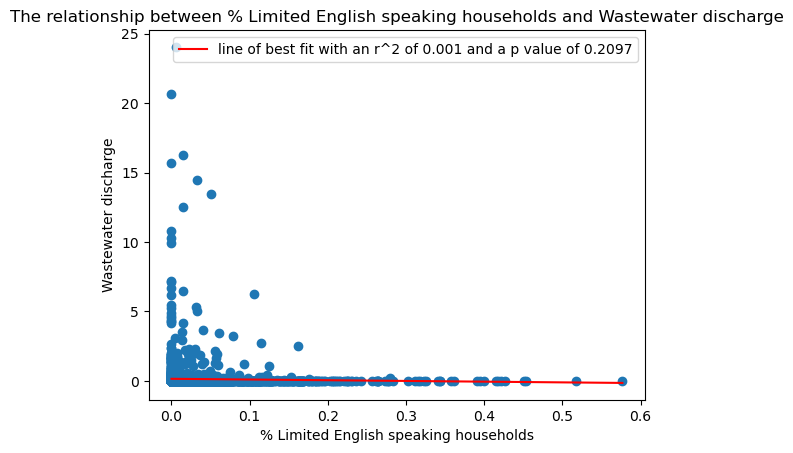

In [19]:
for y_root in y_roots:
    for x_root in x_roots:
        plot_with_regression(x_root, y_root)

In [20]:
# wastewater
wwx_roots = ["PTSDF","D2_PTSDF"]
wwy_roots = ['UST', 'D2_UST', 'D2_PWDIS']

In [21]:
names.query("Fieldname == 'D5_UST'")

,Fieldname,Description


Index(['OID_', 'CNTY_NAME', 'REGION', 'ACSTOTPOP', 'ACSIPOVBAS', 'ACSEDUCBAS',
       'ACSTOTHH', 'DEMOGIDX_2', 'PEOPCOLOR', 'PEOPCOLORPCT', 'LOWINCOME',
       'LOWINCPCT', 'UNEMPPCT', 'LINGISO', 'LINGISOPCT', 'LESSHS', 'LESSHSPCT',
       'UNDER5', 'UNDER5PCT', 'OVER64', 'OVER64PCT', 'PTSDF', 'UST', 'PWDIS',
       'D2_PTSDF', 'D5_PTSDF', 'D2_UST', 'D5_UST', 'D2_PWDIS', 'D5_PWDIS',
       'AREALAND', 'AREAWATER', 'NPL_CNT', 'TSDF_CNT', 'EXCEED_COUNT_80',
       'EXCEED_COUNT_80_SUP'],
      dtype='object')

,Fieldname,Description
42,PTSDF,Hazardous waste proximity


,Fieldname,Description
43,UST,Underground storage tanks


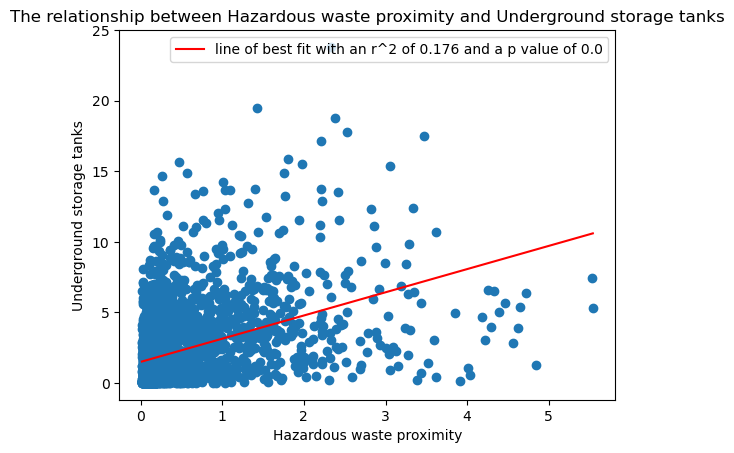

,Fieldname,Description
42,PTSDF,Hazardous waste proximity


,Fieldname,Description
67,D2_UST,Underground storage tanks EJ Index


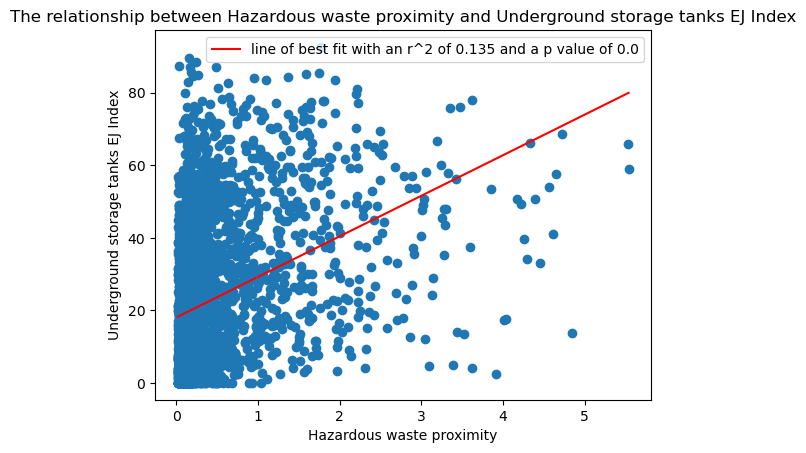

,Fieldname,Description
42,PTSDF,Hazardous waste proximity


,Fieldname,Description
69,D2_PWDIS,Wastewater discharge EJ Index


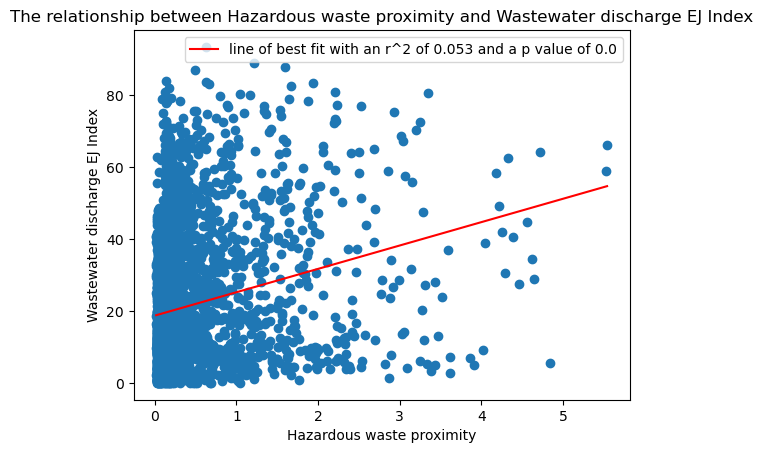

,Fieldname,Description
65,D2_PTSDF,Hazardous waste proximity EJ Index


,Fieldname,Description
43,UST,Underground storage tanks


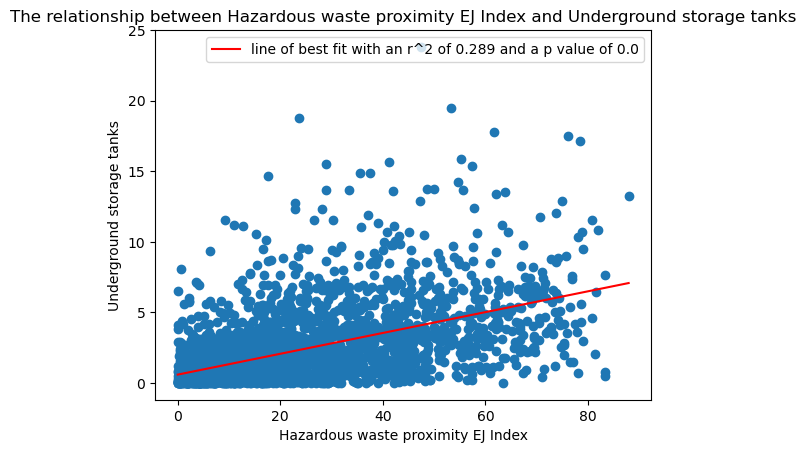

,Fieldname,Description
65,D2_PTSDF,Hazardous waste proximity EJ Index


,Fieldname,Description
67,D2_UST,Underground storage tanks EJ Index


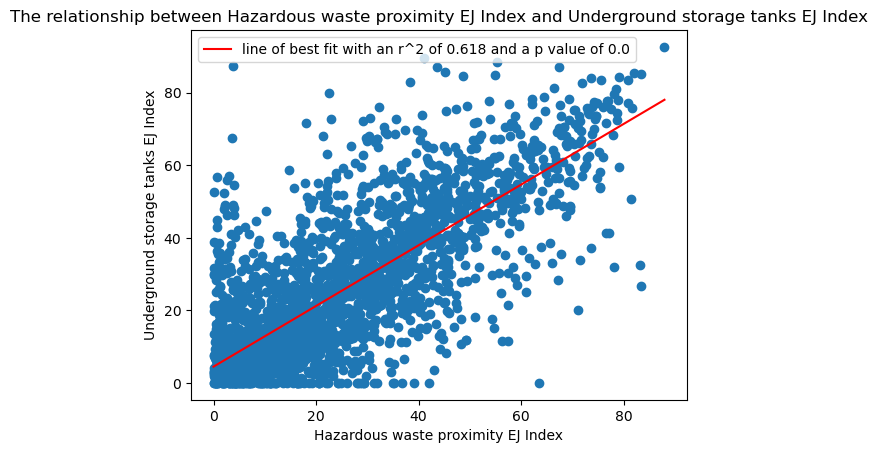

,Fieldname,Description
65,D2_PTSDF,Hazardous waste proximity EJ Index


,Fieldname,Description
69,D2_PWDIS,Wastewater discharge EJ Index


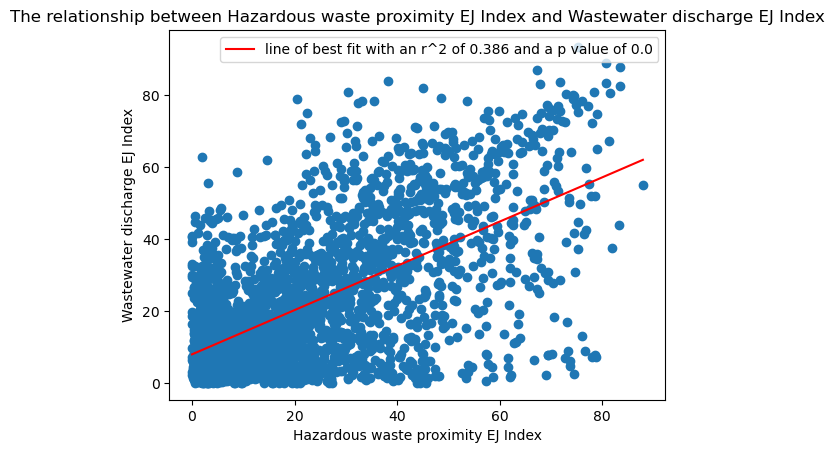

In [22]:
for wx_root in wwx_roots:
    for wy_root in wwy_roots:
        plot_with_regression(wx_root, wy_root)

# Summary

There are 22 total analyses run
In the slide of the presentation, we chose to highlight __________.